# 1.3.1.1 单品种各龄段预测的Leslie模型

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt  

In [11]:
I = np.array([0,0,.05,.05,.1,.1,.2,1,1])
r = 50
beta = [1,.6,.7,.7,.7,.8,.9,.9]
KM = 500

In [3]:
def K(P):
    return I @ P

def F(k):
    return r*(1-k/KM)

def S(x,k):
    return beta[x]*(1 if x < 3 else (1-k/KM))

def L(P):
    k = K(P)
    A = np.zeros((9,9))
    for i in range(8):
        A[i+1,i] = S(i,k)
    A[0,8] = F(k)
    return A

In [14]:
df = pd.DataFrame(columns=[i for i in range(1,10)])
df.loc[0] = [100*(.7**i) for i in range(9)]
for i in range(50):
    P = df.loc[len(df)-1]
    P = L(P) @ P
    df.loc[len(df)] = P
df

,1,2,3,4,5,6,7,8,9
0,100.000000,70.000000,49.000000,34.300000,24.010000,16.807000,11.764900,8.235430,5.764801
1,274.058691,100.000000,42.000000,34.300000,22.828712,15.980099,12.784079,10.067462,7.047223
2,333.074768,274.058691,60.000000,29.400000,22.695818,15.105432,12.084345,10.875911,8.564780
3,402.452419,333.074768,164.435215,42.000000,19.340768,14.930427,11.356682,10.221014,9.198912
4,427.344544,402.452419,199.844861,115.104650,27.316120,12.578922,11.097723,9.496545,8.546891
5,393.157014,427.344544,241.471451,139.891403,74.127401,17.591583,9.258087,9.188916,7.863140
6,356.087250,393.157014,256.406727,169.030016,88.690981,46.996683,12.746334,7.546650,7.490265
7,335.244186,356.087250,235.894209,179.484709,105.914631,55.573991,33.655131,10.268852,6.079821
8,267.513628,335.244186,213.652350,165.125946,110.563207,65.243782,39.124311,26.655015,8.132977
9,342.290585,267.513628,201.146511,149.556645,97.294609,65.145450,43.934383,29.639074,20.192814


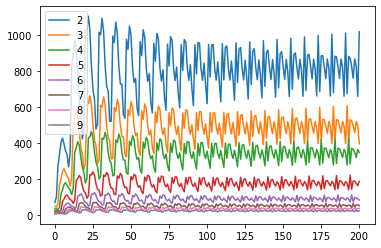

In [13]:
for i in range(2,10):
    plt.plot([*range(len(df))],df[i],label=i)
plt.legend()